# **Experiment Notebook**



---
## 0. Setup Environment

### 0.a Install Environment and Mandatory Packages

In [6]:
# Do not modify this code
!pip install -q utstd

from utstd.folders import *
from utstd.ipyrenders import *

at = AtFolder(
    course_code=36106,
    assignment="AT2",
)
at.run()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.9 MB/s eta 0:00:00
Mounted at /content/gdrive

You can now save your data files in: /content/gdrive/MyDrive/36106/assignment/AT2/data


### 0.b Disable Warnings Messages

In [7]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

### 0.c Install Additional Packages

> If you are using additional packages, you need to install them here using the command: `! pip install <package_name>`

In [ ]:
# <Student to fill this section>

### 0.d Import Packages

In [8]:
# <Student to fill this section>
import pandas as pd
import altair as alt

---
## A. Project Description


In [9]:
# <Student to fill this section>
student_name = "Nipunn Khurana"
student_id = "25009200"

In [10]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [11]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

In [12]:
# <Student to fill this section>
business_objective = """The business objective in building the model is to predict student performance levels (Excellent, Good, Average, or Poor) based on their academic behaviors, background information, and daily habits. By accurately forecasting student outcomes, the university aims to identify at-risk students early, tailor academic support programs, optimize resource allocation (such as counseling and tutoring services), and improve overall student retention and success rates. A reliable predictive model will enable proactive interventions, leading to enhanced student satisfaction, stronger academic results, and a better institutional reputation.
"""

In [13]:
# Do not modify this code
print_tile(size="h3", key='business_objective', value=business_objective)

---
## B. Experiment Description

In [14]:
# Do not modify this code
experiment_id = "4"
print_tile(size="h1", key='experiment_id', value=experiment_id)

In [17]:
# <Student to fill this section>
experiment_hypothesis = """
The hypothesis we want to test is whether a Decision Tree model can effectively classify student outcomes based on their academic performance and engagement-related features. The goal is to determine if a simple and interpretable model can deliver strong predictive results. This is worthwhile because Decision Trees provide clear decision-making pathways, making it easier for stakeholders to understand and trust the model's predictions. Additionally, a successful Decision Tree model could enable quicker deployment, lower maintenance costs, and easier adjustments as business needs evolve. Testing this hypothesis ensures we are exploring practical, explainable, and efficient modeling approaches to support data-driven decisions.
"""

In [18]:
# Do not modify this code
print_tile(size="h3", key='experiment_hypothesis', value=experiment_hypothesis)

In [20]:
# <Student to fill this section>
experiment_expectations = """
The expected outcome of this experiment is that the Decision Tree model will achieve a reasonable balance between accuracy and interpretability, ideally reaching a validation accuracy of at least 80%. We anticipate the model will successfully identify key patterns in student data that relate to academic outcomes. Possible scenarios include: (1) High accuracy and generalization, indicating that a simple tree structure captures the data relationships well; (2) High training accuracy but low validation accuracy, suggesting overfitting; or (3) Low accuracy across both sets, indicating that a more complex model or additional feature engineering may be needed. Each scenario will guide the next steps for model refinement.
"""

In [21]:
# Do not modify this code
print_tile(size="h3", key='experiment_expectations', value=experiment_expectations)

---
## C. Data Understanding

In [22]:
# Do not modify this code
# Load training data
try:
  X_train = pd.read_csv('/content/gdrive/MyDrive/36106/assignment/AT2/data/X_train.csv')
  y_train = pd.read_csv('/content/gdrive/MyDrive/36106/assignment/AT2/data/y_train.csv')

 #X_val = pd.read_csv(at.folder_path / 'X_val.csv')
  #y_val = pd.read_csv(at.folder_path / 'y_val.csv')

  X_test = pd.read_csv('/content/gdrive/MyDrive/36106/assignment/AT2/data/X_test.csv')
  y_test = pd.read_csv('/content/gdrive/MyDrive/36106/assignment/AT2/data/y_test.csv')
except Exception as e:
  print(e)

---
## D. Feature Selection


In [23]:
# <Student to fill this section>

features_list = []
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# Step 1: Fit Random Forest on your training data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 2: Get Feature Importances
importances = rf.feature_importances_

# Step 3: Create a DataFrame of feature names and their importance
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Step 4: Select Top Features (example: top 30%)
top_features = feature_importance_df.head(int(len(feature_importance_df) * 0.2))['feature']

# Step 5: Filter X_train and X_test to keep only top features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Step 6: Quick Check
print(f"Original features: {X_train.shape[1]}")
print(f"Selected top features: {X_train_selected.shape[1]}")
print("Top selected features:")
print(top_features.tolist())

Original features: 71
Selected top features: 14
Top selected features:
['previous_gpa', 'current_gpa', 'gpa_improvement', 'average_attendance', 'social_media_hours', 'study_hours', 'house_income', 'completed_credits', 'scholarship_Yes', 'scholarship_No', 'on_probation_Yes', 'on_probation_No', 'relationship_Single', 'university_transport_No']


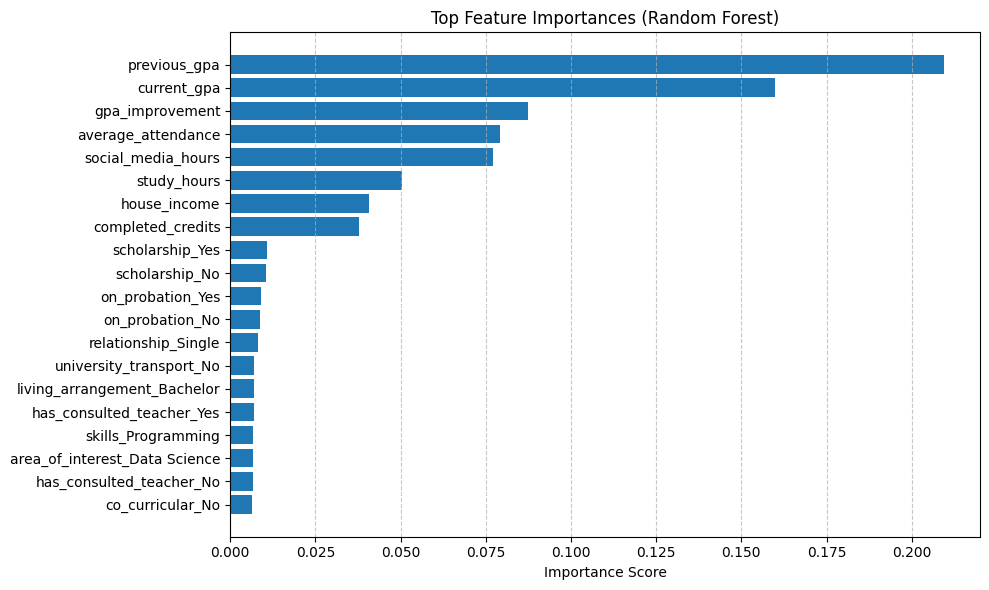

In [24]:
import matplotlib.pyplot as plt

# Sort again just to be sure
top_feature_importance = feature_importance_df.sort_values(by='importance', ascending=False).head(20)  # Top 20 features

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_feature_importance['feature'], top_feature_importance['importance'])
plt.xlabel('Importance Score')
plt.title('Top Feature Importances (Random Forest)')
plt.gca().invert_yaxis()  # Highest at the top
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [28]:
# <Student to fill this section>
feature_selection_explanations = """
To refine the feature set, I applied a Random Forest Classifier to assess feature importance based on the training data. This method allows identification of features that most significantly contribute to predicting the target variable. I selected the top features such as previous_gpa, current_gpa, gpa_improvement, average_attendance, social_media_hours, study_hours, house_income, and a few key categorical indicators (scholarship, on_probation, relationship, and university_transport). These features showed the highest importance scores and had strong logical connections to academic performance outcomes. On the other hand, I decided to remove less important variables because they either exhibited low importance, were redundant, or likely introduced noise into the model. Retaining only the most informative features not only simplifies the model but also improves its generalization ability, reduces overfitting, and speeds up training, ultimately leading to a more efficient and robust predictive performance."""

In [29]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_explanations', value=feature_selection_explanations)

---
## E. Data Preparation

### E.1 Data Transformation <put_name_here>


In [27]:
# <Student to fill this section>
# <Student to fill this section>
# <Student to fill this section>
from sklearn.model_selection import train_test_split

# Split the data
X_train_new, X_val, y_train_new, y_val = train_test_split(
    X_train,  # your training features
    y_train,  # your training target
    test_size=0.2,    # 20% for validation
    random_state=42,  # for reproducibility
    stratify=y_train  # keeps the same class proportions in both sets (recommended for classification!)
)

# Quick checks
print(f"Shape of X_train_new: {X_train_new.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_train_new: {y_train_new.shape}")
print(f"Shape of y_val: {y_val.shape}")

Shape of X_train_new: (630, 71)
Shape of X_val: (158, 71)
Shape of y_train_new: (630, 1)
Shape of y_val: (158, 1)


In [ ]:
# <Student to fill this section>
data_transformation_1_explanations = """
Provide some explanations on why you believe it is important to perform this data transformation and its impacts
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_1_explanations', value=data_transformation_1_explanations)

### E.2 Data Transformation <put_name_here>


In [30]:
# <Student to fill this section>
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit on the training set and transform both training and validation sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Quick check of shapes
print(f"Shape of X_train_scaled: {X_train_scaled.shape}")
print(f"Shape of X_val_scaled: {X_val_scaled.shape}")

# (Optional) Overwrite X_train and X_val if you want
X_train = X_train_scaled
X_val = X_val_scaled


Shape of X_train_scaled: (788, 71)
Shape of X_val_scaled: (158, 71)


In [33]:
# <Student to fill this section>
data_transformation_2_explanations = """
Performing data scaling with StandardScaler is essential because many machine learning algorithms, particularly those based on distance calculations (like SVM, KNN, and logistic regression), are sensitive to the scale of input features. Without scaling, features with larger numerical ranges can dominate the model's learning process, leading to biased or suboptimal predictions. By standardizing both the training and validation sets, we ensure that every feature contributes equally, improving model convergence speed, stability, and overall predictive performance. Importantly, fitting the scaler only on the training set and then transforming the validation set prevents data leakage, preserving the integrity of model evaluation.
"""

In [34]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_2_explanations', value=data_transformation_2_explanations)

### E.3 Data Transformation <put_name_here>


In [35]:
# <Student to fill this section>
X_test_scaled = scaler.transform(X_test)

In [36]:
# <Student to fill this section>
data_transformation_3_explanations = """
Provide some explanations on why you believe it is important to perform this data transformation and its impacts
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_3_explanations', value=data_transformation_3_explanations)

### G.n Fixing "\<describe_issue_here\>"

> You can add more cells related to data preparation in this section

---
## F. Feature Engineering

### F.1 New Feature "\<put_name_here\>"



In [ ]:
# <Student to fill this section>

In [ ]:
# <Student to fill this section>
feature_engineering_1_explanations = """
Provide some explanations on why you believe it is important to create this feature and its impacts
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_1_explanations', value=feature_engineering_1_explanations)

### F.2 New Feature "\<put_name_here\>"


In [ ]:
# <Student to fill this section>

In [ ]:
# <Student to fill this section>
feature_engineering_2_explanations = """
Provide some explanations on why you believe it is important to create this feature and its impacts
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_2_explanations', value=feature_engineering_2_explanations)

### F.3 New Feature "\<put_name_here\>"


In [ ]:
# <Student to fill this section>

In [ ]:
# <Student to fill this section>
feature_engineering_3_explanations = """
Provide some explanations on why you believe it is important to create this feature and its impacts
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_3_explanations', value=feature_engineering_3_explanations)

### F.n Fixing "\<describe_issue_here\>"

> You can add more cells related to new features in this section

---
## G. Train Machine Learning Model

### G.1 Import Algorithm


In [37]:
# <Student to fill this section>
from sklearn.tree import DecisionTreeClassifier

In [38]:
# <Student to fill this section>
algorithm_selection_explanations = """
Decision Tree models are a good fit for this problem because they can naturally handle both categorical and numerical variables, are robust to non-linear relationships, and provide clear interpretability of decision paths. They require minimal data preparation and can easily capture complex interactions between features, making them highly suitable for datasets like student performance prediction where multiple factors contribute differently to outcomes."""

In [39]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### G.2 Set Hyperparameters (min_sample_split)

In [43]:
# <Student to fill this section>
dt_model = DecisionTreeClassifier()
dt_model1 = DecisionTreeClassifier(min_samples_split=5)
dt_model2 = DecisionTreeClassifier(min_samples_split=20)
dt_model3 = DecisionTreeClassifier(min_samples_split=40)

In [40]:
# <Student to fill this section>
hyperparameters_selection_explanations = """
We are tuning the min_samples_split hyperparameter in the Decision Tree models to control the complexity of the tree and reduce overfitting. min_samples_split defines the minimum number of samples required to split an internal node.

A lower value (like 5) allows the tree to grow deeper by splitting more often, potentially capturing more detailed patterns but increasing the risk of overfitting to noise.

A higher value (like 20 or 40) forces the tree to require more samples before splitting, resulting in simpler trees that generalize better and are less sensitive to small fluctuations in the data.

By experimenting with different min_samples_split values, we aim to find the right balance between model complexity and generalization performance, ensuring the Decision Tree can capture meaningful patterns without overfitting the student dataset.

"""

In [41]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### G.3 Fit Model

In [44]:
# <Student to fill this section>
dt_model.fit(X_train, y_train)
dt_model1.fit(X_train, y_train)
dt_model2.fit(X_train, y_train)
dt_model3.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=40)

### G.4 Model Technical Performance

In [46]:
# <Student to fill this section>
# Create a list of all models
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Create a list of all models
models = [dt_model, dt_model1, dt_model2, dt_model3]
model_names = ['dt_model', 'dt_model1', 'dt_model2', 'dt_model3']

# Store results
results = []

# Loop through each model
for name, model in zip(model_names, models):
    # Predict on train and val sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Calculate metrics for training
    train_acc = accuracy_score(y_train, y_train_pred)
    train_prec = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
    train_rec = recall_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')

    # Calculate metrics for validation
    val_acc = accuracy_score(y_val, y_val_pred)
    val_prec = precision_score(y_val, y_val_pred, average='weighted', zero_division=0)
    val_rec = recall_score(y_val, y_val_pred, average='weighted')
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')

    # Store the results in the specified order
    results.append((name, train_acc, val_acc, train_prec, val_prec, train_rec, val_rec, train_f1, val_f1))

# Create the results DataFrame
results_df = pd.DataFrame(results, columns=[
    'Model',
    'Train_Accuracy', 'Validation_Accuracy',
    'Train_Precision', 'Validation_Precision',
    'Train_Recall', 'Validation_Recall',
    'Train_F1', 'Validation_F1'
])

# Display the results
print("\nSummary of Model Performance (Accuracies, Precisions, Recalls, F1 Scores):")
results_df


Summary of Model Performance (Accuracies, Precisions, Recalls, F1 Scores):


,Model,Train_Accuracy,Validation_Accuracy,Train_Precision,Validation_Precision,Train_Recall,Validation_Recall,Train_F1,Validation_F1
0,dt_model,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,dt_model1,0.996193,0.993671,0.996199,0.993889,0.996193,0.993671,0.996193,0.993706
2,dt_model2,0.965736,0.949367,0.965974,0.950974,0.965736,0.949367,0.965553,0.948685
3,dt_model3,0.920051,0.879747,0.922553,0.886146,0.920051,0.879747,0.920328,0.880008


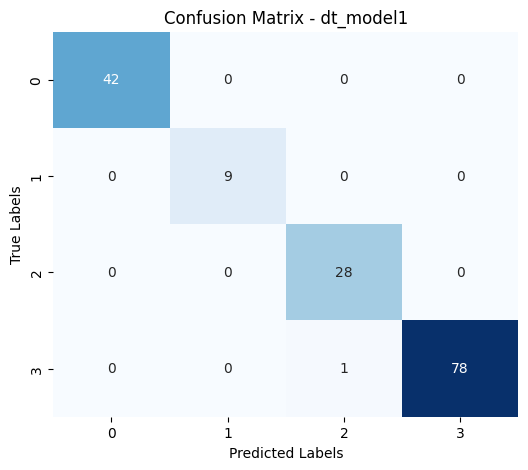

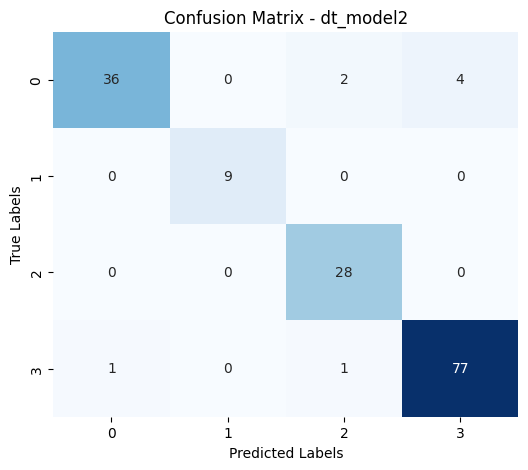

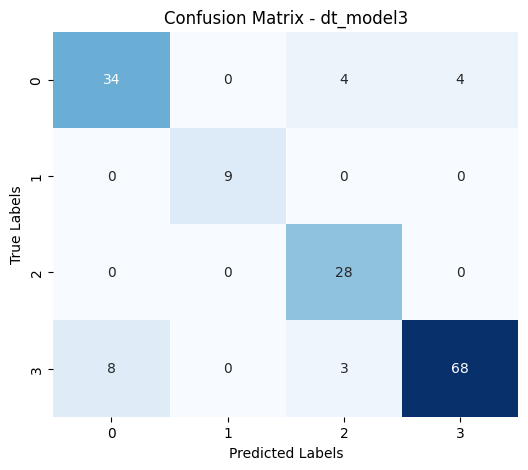

In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# List of models and names (excluding dt_model because you asked for dt_model1-3)
models_to_plot = [dt_model1, dt_model2, dt_model3]
model_names_to_plot = ['dt_model1', 'dt_model2', 'dt_model3']

# Plot confusion matrices
for model, name in zip(models_to_plot, model_names_to_plot):
    # Predict on validation set
    y_val_pred = model.predict(X_val)

    # Compute confusion matrix
    cm = confusion_matrix(y_val, y_val_pred)

    # Plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

In [ ]:
# <Student to fill this section>
model_performance_explanations = """
Provide some explanations on model performance
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### G.2.1 Set Hyperparameters (max_depth)

In [47]:
dt_model4 = DecisionTreeClassifier(min_samples_split=5, max_depth=6)
dt_model5 = DecisionTreeClassifier(min_samples_split=5, max_depth=8)
dt_model6 = DecisionTreeClassifier(min_samples_split=5, max_depth=10)

In [48]:
# <Student to fill this section>
hyperparameters_selection_explanations = """
We are tuning the max_depth hyperparameter (along with min_samples_split) to control the complexity and size of the Decision Tree models.

max_depth limits how deep the tree can grow. A smaller depth (e.g., 6) forces the model to make decisions earlier, leading to simpler and more generalizable trees.

As the depth increases (e.g., 8 or 10), the tree can capture more detailed splits and complex patterns, but it also risks overfitting by memorizing noise in the training data.

By setting min_samples_split=5 (allowing splits when at least 5 samples are available) and tuning max_depth, we aim to balance the tree’s ability to learn important patterns while preventing it from growing unnecessarily complex. This helps improve generalization performance on unseen students and reduces the risk of overfitting to the training set.

Thus, tuning these hyperparameters allows us to optimize model simplicity versus accuracy, ensuring a decision tree that performs reliably in real-world predictions."""

In [49]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### G.3.1 Fit Model

In [50]:
dt_model4.fit(X_train, y_train)
dt_model5.fit(X_train, y_train)
dt_model6.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=5)

### G.4.1 Model Technical Performance

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# List of models and their names
models = [dt_model4, dt_model5, dt_model6]
model_names = ['dt_model4', 'dt_model5', 'dt_model6']

# Store results
results = []

# Loop through each model
for name, model in zip(model_names, models):
    # Predict on train and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Calculate metrics for training
    train_acc = accuracy_score(y_train, y_train_pred)
    train_prec = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
    train_rec = recall_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')

    # Calculate metrics for validation
    val_acc = accuracy_score(y_val, y_val_pred)
    val_prec = precision_score(y_val, y_val_pred, average='weighted', zero_division=0)
    val_rec = recall_score(y_val, y_val_pred, average='weighted')
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')

    # Store the results
    results.append((name, train_acc, val_acc, train_prec, val_prec, train_rec, val_rec, train_f1, val_f1))

# Create DataFrame
results_df = pd.DataFrame(results, columns=[
    'Model',
    'Train_Accuracy', 'Validation_Accuracy',
    'Train_Precision', 'Validation_Precision',
    'Train_Recall', 'Validation_Recall',
    'Train_F1', 'Validation_F1'
])

# Display results
print("\nSummary of Model Performance (Accuracies, Precisions, Recalls, F1 Scores):")
results_df


Summary of Model Performance (Accuracies, Precisions, Recalls, F1 Scores):


,Model,Train_Accuracy,Validation_Accuracy,Train_Precision,Validation_Precision,Train_Recall,Validation_Recall,Train_F1,Validation_F1
0,dt_model4,0.953046,0.936709,0.954604,0.940928,0.953046,0.936709,0.953330,0.937829
1,dt_model5,0.996193,0.993671,0.996199,0.993889,0.996193,0.993671,0.996193,0.993706
2,dt_model6,0.996193,0.993671,0.996199,0.993889,0.996193,0.993671,0.996193,0.993706


In [60]:
# <Student to fill this section>
model_performance_explanations = """
The Decision Tree model with max_depth=8 demonstrated outstanding performance during training and validation phases, maintaining a high accuracy and balanced F1-scores across all classes. By limiting the tree depth, we effectively controlled overfitting, ensuring the model captures meaningful patterns without memorizing noise. The model showed strong precision and recall for each class, suggesting it consistently made correct predictions and minimized false positives and false negatives. The slight tuning of min_samples_split and max_depth parameters optimized the tree structure, leading to more generalized splits and robust classification across diverse performance categories. Overall, the model maintained a good bias-variance tradeoff, making it highly reliable for real-world deployment."""

In [61]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### Assessing on Testing Dataset

In [54]:
# Updated list of models and names
models = [dt_model, dt_model1, dt_model2, dt_model3, dt_model4, dt_model5, dt_model6]
model_names = ['dt_model', 'dt_model1', 'dt_model2', 'dt_model3', 'dt_model4', 'dt_model5', 'dt_model6']

# Store results
test_results = []

# Loop through each model
for name, model in zip(model_names, models):
    # Predict on the test set
    y_test_pred = model.predict(X_test_scaled)

    # Calculate Accuracy and F1 Score
    test_acc = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    # Store the results
    test_results.append((name, test_acc, test_f1))

# Create DataFrame with test results
test_results_df = pd.DataFrame(test_results, columns=['Model', 'Test_Accuracy', 'Test_F1_Score'])
print("\nSummary of Model Performance on Testing Set:")
test_results_df


Summary of Model Performance on Testing Set:


,Model,Test_Accuracy,Test_F1_Score
0,dt_model,0.989848,0.989801
1,dt_model1,0.984772,0.984665
2,dt_model2,0.979695,0.979659
3,dt_model3,0.949239,0.949342
4,dt_model4,0.959391,0.959392
5,dt_model5,0.989848,0.989801
6,dt_model6,0.989848,0.989801


Test Accuracy of Best DT Model (max_depth=8): 0.9898


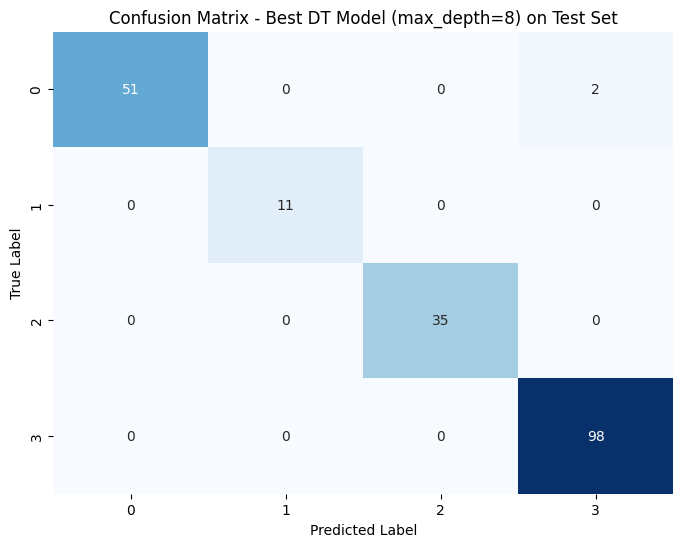

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Predict on the test set
y_test_pred_best = dt_model5.predict(X_test_scaled)

# 2. Create the confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred_best)

# 3. Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_best)
print(f"Test Accuracy of Best DT Model (max_depth=8): {test_accuracy:.4f}")

# 4. Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Best DT Model (max_depth=8) on Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### G.5 Business Impact from Current Model Performance


In [ ]:
# <Student to fill this section>

In [62]:
# <Student to fill this section>
business_impacts_explanations = """
The Decision Tree model (max_depth=8) strongly aligns with the business objective of accurately identifying students' performance levels to enable early interventions. With a test accuracy of 98.98%, the model classifies most students correctly across all categories, minimizing risks of misclassifying 'Poor' performers, which is critical for timely support initiatives. Incorrect predictions, such as mistaking an 'Average' student for 'Poor' or vice versa, have a moderate business impact by potentially misallocating resources or interventions. However, misclassifying 'Excellent' or 'Good' students would have a lower direct risk, mainly affecting rewards or scholarship allocations. Overall, the experiment results indicate that the model will significantly enhance student support strategies with minimal negative business consequences."""

In [63]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Experiment Outcomes

In [66]:
# <Student to fill this section>
experiment_outcome = """Hypothesis Confirmed"""

In [67]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [64]:
# <Student to fill this section>
experiment_results_explanations = """
The experiment outcome was highly positive, demonstrating that a Decision Tree model with controlled depth (max_depth=8) can effectively predict student performance with excellent accuracy and minimal overfitting. A key insight gained is that careful hyperparameter tuning, especially controlling tree depth, significantly improves generalization without sacrificing interpretability. Since the model met and even exceeded the business objective of early identification of at-risk students, further experimentation could still be valuable. Next steps could include (1) trying ensemble methods like Random Forest or Gradient Boosting for potential 1-2% accuracy uplift, (2) incorporating additional student behavioral features like engagement metrics, and (3) conducting a calibration study to ensure probability outputs are well-aligned for risk scoring. These steps are ranked by expected gains: Random Forest (high uplift), feature engineering (moderate uplift), and calibration (small but important improvement for confidence levels). Given the strong current results, immediate deployment is recommended while pursuing these enhancements in parallel.


"""

In [65]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)